---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

## Assignment 4 - Understanding and Predicting Property Maintenance Fines

This assignment is based on a data challenge from the Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)). 

The Michigan Data Science Team ([MDST](http://midas.umich.edu/mdst/)) and the Michigan Student Symposium for Interdisciplinary Statistical Sciences ([MSSISS](https://sites.lsa.umich.edu/mssiss/)) have partnered with the City of Detroit to help solve one of the most pressing problems facing Detroit - blight. [Blight violations](http://www.detroitmi.gov/How-Do-I/Report/Blight-Complaint-FAQs) are issued by the city to individuals who allow their properties to remain in a deteriorated condition. Every year, the city of Detroit issues millions of dollars in fines to residents and every year, many of these fines remain unpaid. Enforcing unpaid blight fines is a costly and tedious process, so the city wants to know: how can we increase blight ticket compliance?

The first step in answering this question is understanding when and why a resident might fail to comply with a blight ticket. This is where predictive modeling comes in. For this assignment, your task is to predict whether a given blight ticket will be paid on time.

All data for this assignment has been provided to us through the [Detroit Open Data Portal](https://data.detroitmi.gov/). **Only the data already included in your Coursera directory can be used for training the model for this assignment.** Nonetheless, we encourage you to look into data from other Detroit datasets to help inform feature creation and model selection. We recommend taking a look at the following related datasets:

* [Building Permits](https://data.detroitmi.gov/Property-Parcels/Building-Permits/xw2a-a7tf)
* [Trades Permits](https://data.detroitmi.gov/Property-Parcels/Trades-Permits/635b-dsgv)
* [Improve Detroit: Submitted Issues](https://data.detroitmi.gov/Government/Improve-Detroit-Submitted-Issues/fwz3-w3yn)
* [DPD: Citizen Complaints](https://data.detroitmi.gov/Public-Safety/DPD-Citizen-Complaints-2016/kahe-efs3)
* [Parcel Map](https://data.detroitmi.gov/Property-Parcels/Parcel-Map/fxkw-udwf)

___

We provide you with two data files for use in training and validating your models: train.csv and test.csv. Each row in these two files corresponds to a single blight ticket, and includes information about when, why, and to whom each ticket was issued. The target variable is compliance, which is True if the ticket was paid early, on time, or within one month of the hearing data, False if the ticket was paid after the hearing date or not at all, and Null if the violator was found not responsible. Compliance, as well as a handful of other variables that will not be available at test-time, are only included in train.csv.

Note: All tickets where the violators were found not responsible are not considered during evaluation. They are included in the training set as an additional source of data for visualization, and to enable unsupervised and semi-supervised approaches. However, they are not included in the test set.

<br>

**File descriptions** (Use only this data for training your model!)

    readonly/train.csv - the training set (all tickets issued 2004-2011)
    readonly/test.csv - the test set (all tickets issued 2012-2016)
    readonly/addresses.csv & readonly/latlons.csv - mapping from ticket id to addresses, and from addresses to lat/lon coordinates. 
     Note: misspelled addresses may be incorrectly geolocated.

<br>

**Data fields**

train.csv & test.csv

    ticket_id - unique identifier for tickets
    agency_name - Agency that issued the ticket
    inspector_name - Name of inspector that issued the ticket
    violator_name - Name of the person/organization that the ticket was issued to
    violation_street_number, violation_street_name, violation_zip_code - Address where the violation occurred
    mailing_address_str_number, mailing_address_str_name, city, state, zip_code, non_us_str_code, country - Mailing address of the violator
    ticket_issued_date - Date and time the ticket was issued
    hearing_date - Date and time the violator's hearing was scheduled
    violation_code, violation_description - Type of violation
    disposition - Judgment and judgement type
    fine_amount - Violation fine amount, excluding fees
    admin_fee - $20 fee assigned to responsible judgments
state_fee - $10 fee assigned to responsible judgments
    late_fee - 10% fee assigned to responsible judgments
    discount_amount - discount applied, if any
    clean_up_cost - DPW clean-up or graffiti removal cost
    judgment_amount - Sum of all fines and fees
    grafitti_status - Flag for graffiti violations
    
train.csv only

    payment_amount - Amount paid, if any
    payment_date - Date payment was made, if it was received
    payment_status - Current payment status as of Feb 1 2017
    balance_due - Fines and fees still owed
    collection_status - Flag for payments in collections
    compliance [target variable for prediction] 
     Null = Not responsible
     0 = Responsible, non-compliant
     1 = Responsible, compliant
    compliance_detail - More information on why each ticket was marked compliant or non-compliant


___

## Evaluation

Your predictions will be given as the probability that the corresponding blight ticket will be paid on time.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC). 

Your grade will be based on the AUC score computed for your classifier. A model which with an AUROC of 0.7 passes this assignment, over 0.75 will recieve full points.
___

For this assignment, create a function that trains a model to predict blight ticket compliance in Detroit using `readonly/train.csv`. Using this model, return a series of length 61001 with the data being the probability that each corresponding ticket from `readonly/test.csv` will be paid, and the index being the ticket_id.

Example:

    ticket_id
       284932    0.531842
       285362    0.401958
       285361    0.105928
       285338    0.018572
                 ...
       376499    0.208567
       376500    0.818759
       369851    0.018528
       Name: compliance, dtype: float32
       
### Hints

* Make sure your code is working before submitting it to the autograder.

* Print out your result to see whether there is anything weird (e.g., all probabilities are the same).

* Generally the total runtime should be less than 10 mins. You should NOT use Neural Network related classifiers (e.g., MLPClassifier) in this question. 

* Try to avoid global variables. If you have other functions besides blight_model, you should move those functions inside the scope of blight_model.

* Refer to the pinned threads in Week 4's discussion forum when there is something you could not figure it out.

In [26]:
import pandas as pd
import numpy as np

def blight_model():
    from sklearn import preprocessing
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    
    # Your code here
    # Reading the csv files
    #df_train = pd.read_csv('readonly/train.csv', encoding='cp1252')
    df_train = pd.read_csv('train.csv', encoding='cp1252')
    df_test = pd.read_csv('test.csv', encoding='cp1252')
    df_addresses = pd.read_csv('addresses.csv', encoding='cp1252')
    df_latlons = pd.read_csv('latlons.csv', encoding='cp1252')
    
    # Targert column
    target_col = 'compliance'
    
    # Merging the data frames
    df_addresses = pd.merge(df_addresses, df_latlons, on="address")
    df_train = pd.merge(df_train, df_addresses, on="ticket_id")
    df_test = pd.merge(df_test, df_addresses, on="ticket_id")
    
    # Preprocessing
    # String to date
    #df_train['ticket_issued_date'] = pd.to_datetime(df_train['ticket_issued_date'], format="%Y-%m-%d %H:%M:%S")
    #df_train['hearing_date'] = pd.to_datetime(df_train['hearing_date'], format="%Y-%m-%d %H:%M:%S")
    #df_test['ticket_issued_date'] = pd.to_datetime(df_test['ticket_issued_date'], format="%Y-%m-%d %H:%M:%S")
    #df_test['hearing_date'] = pd.to_datetime(df_test['hearing_date'], format="%Y-%m-%d %H:%M:%S")
    
    #df_train = df_train[~df_train['hearing_date'].isnull()]
    
    #mean_hearing_days_diff = (df_train['hearing_date'] - df_train['ticket_issued_date']).mean()
    #df_train.loc[df_train['hearing_date'].isnull(), ['hearing_date']] = df_train['ticket_issued_date'] + mean_hearing_days_diff
    #df_test.loc[df_test['hearing_date'].isnull(), ['hearing_date']] = df_test['ticket_issued_date'] + mean_hearing_days_diff

    # Columns to drop from dataframe as they are not present in test dataframe
    columns_to_drop = ['violation_zip_code', 'non_us_str_code', 'payment_amount', 
                       'payment_date', 'payment_status', 'balance_due', 
                       'collection_status', 'grafitti_status', 'compliance_detail',
                       'address']
    
    #string_obj_to_drop = ['violator_name', 'violation_street_name', 
    #                      'mailing_address_str_name', 'city', 'zip_code']
    string_obj_to_drop = [col for col in df_train.columns 
                          if df_train[col].dtype == 'object' 
                          and len(df_train[col].unique())/len(df_train)*100 > 3]
    
    date_columns_to_drop = ['hearing_date', 'ticket_issued_date']
    
    columns_to_drop = columns_to_drop + string_obj_to_drop + date_columns_to_drop
    
    df_train = df_train.drop(columns_to_drop, axis=1, errors='ignore')
    df_test = df_test.drop(columns_to_drop, axis=1, errors='ignore')
    
    # Use mean encoding to replace categorical values
    for col in df_train.columns:
        if df_train[col].dtype == 'object':
            mean_encoded_val = df_train.groupby([col])[target_col].mean().to_dict()
            df_train[col] =  df_train[col].map(mean_encoded_val)
            df_test[col] =  df_test[col].map(mean_encoded_val)

    string_obj_to_drop_test = [col for col in df_test.columns 
                               if df_test[col].dtype == 'object']
    
    #print("string_obj_to_drop_test: ", string_obj_to_drop_test)
    
    df_train = df_train.drop(string_obj_to_drop_test, axis=1, errors='ignore')
    df_test = df_test.drop(string_obj_to_drop_test, axis=1, errors='ignore')
    
    # Replace Na with 0
    df_train.fillna(0, inplace=True)
    df_test.fillna(0, inplace=True)
    
    X_train = df_train.drop([target_col], axis=1)
    y_train = df_train[target_col]
    #X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
    
    X_test = df_test
    
    # Scale Features To Reduce Computation Time
    scaler = preprocessing.MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #clf = RandomForestClassifier()
    clf = GradientBoostingClassifier()
    #clf.fit(X_train, y_train)
    #y_pred = clf.predict_proba(X_test)[:,1]
    
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict_proba(X_test_scaled)[:,1]
    
    df_test.set_index('ticket_id', inplace=True)
    df_test[target_col] = y_pred
    
    return df_test[target_col]

In [16]:
"""
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Reading the csv files
#df_train = pd.read_csv('readonly/train.csv', encoding='cp1252')
df_train = pd.read_csv('readonly/train.csv', encoding='cp1252')
df_test = pd.read_csv('readonly/test.csv', encoding='cp1252')
df_addresses = pd.read_csv('readonly/addresses.csv', encoding='cp1252')
df_latlons = pd.read_csv('readonly/latlons.csv', encoding='cp1252')
    
# Targert column
target_col = 'compliance'

# Merging the data frames
df_addresses = pd.merge(df_addresses, df_latlons, on="address")
df_train = pd.merge(df_train, df_addresses, on="ticket_id")
df_test = pd.merge(df_test, df_addresses, on="ticket_id")

# Preprocessing
# String to date
#df_train['ticket_issued_date'] = pd.to_datetime(df_train['ticket_issued_date'], format="%Y-%m-%d %H:%M:%S")
#df_train['hearing_date'] = pd.to_datetime(df_train['hearing_date'], format="%Y-%m-%d %H:%M:%S")
#df_test['ticket_issued_date'] = pd.to_datetime(df_test['ticket_issued_date'], format="%Y-%m-%d %H:%M:%S")
#df_test['hearing_date'] = pd.to_datetime(df_test['hearing_date'], format="%Y-%m-%d %H:%M:%S")

#df_train = df_train[~df_train['hearing_date'].isnull()]

#mean_hearing_days_diff = (df_train['hearing_date'] - df_train['ticket_issued_date']).mean()
#df_train.loc[df_train['hearing_date'].isnull(), ['hearing_date']] = df_train['ticket_issued_date'] + mean_hearing_days_diff
#df_test.loc[df_test['hearing_date'].isnull(), ['hearing_date']] = df_test['ticket_issued_date'] + mean_hearing_days_diff

# Columns to drop from dataframe as they are not present in test dataframe
columns_to_drop = ['violation_zip_code', 'non_us_str_code', 'payment_amount', 
                   'payment_date', 'payment_status', 'balance_due', 
                   'collection_status', 'grafitti_status', 'compliance_detail',
                   'address']

#string_obj_to_drop = ['violator_name', 'violation_street_name', 
#                      'mailing_address_str_name', 'city', 'zip_code']
string_obj_to_drop = [col for col in df_train.columns 
                      if df_train[col].dtype == 'object' 
                      and len(df_train[col].unique())/len(df_train)*100 > 3]

date_columns_to_drop = ['hearing_date', 'ticket_issued_date']

columns_to_drop = columns_to_drop + string_obj_to_drop + date_columns_to_drop

df_train = df_train.drop(columns_to_drop, axis=1, errors='ignore')
df_test = df_test.drop(columns_to_drop, axis=1, errors='ignore')

# Use mean encoding to replace categorical values
for col in df_train.columns:
    if df_train[col].dtype == 'object':
        mean_encoded_val = df_train.groupby([col])[target_col].mean().to_dict()
        df_train[col] =  df_train[col].map(mean_encoded_val)
        df_test[col] =  df_test[col].map(mean_encoded_val)

string_obj_to_drop_test = [col for col in df_test.columns 
                           if df_test[col].dtype == 'object']

#print("string_obj_to_drop_test: ", string_obj_to_drop_test)

df_train = df_train.drop(string_obj_to_drop_test, axis=1, errors='ignore')
df_test = df_test.drop(string_obj_to_drop_test, axis=1, errors='ignore')

# Replace Na with 0
df_train.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

#X_train = df_train.drop([target_col], axis=1)
#y_train = df_train[target_col]

X = df_train.drop([target_col], axis=1)
y = df_train[target_col]

"""

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (11,12,31) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
"""
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

#X_test = df_test

# Scale Features To Reduce Computation Time
scaler = preprocessing.MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#clf = RandomForestClassifier()
#clf.fit(X_train, y_train)
#y_pred = clf.predict_proba(X_test)[:,1]

#clf = RandomForestClassifier()
clf = GradientBoostingClassifier()
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

#print(clf.score(y_pred, y_test))
#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_pred.shape)
"""

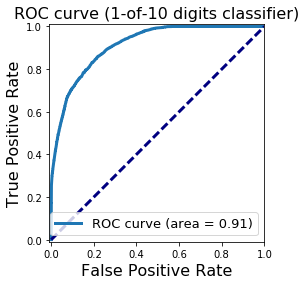

In [21]:
"""
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score = clf.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()
"""

In [22]:
#print(clf.score(X_train, y_train))
#print(clf.score(X_test, y_test))
#print(clf.predict_proba(X_test))

0.945043120669
0.944708119597
[[  9.99045540e-01   9.54459583e-04]
 [  9.98836370e-01   1.16362982e-03]
 [  9.97694006e-01   2.30599380e-03]
 ..., 
 [  9.75377797e-01   2.46222033e-02]
 [  9.98142363e-01   1.85763652e-03]
 [  9.77929226e-01   2.20707735e-02]]


In [53]:
#mean_hearing_days_diff = (df_train['hearing_date'] - df_train['ticket_issued_date']).mean()
#df_train.loc[df_train['hearing_date'].isnull(), ['hearing_date']] = df_train['ticket_issued_date'] + mean_hearing_days_diff


In [18]:
#df_train.head()

,ticket_id,agency_name,inspector_name,violation_street_number,violation_street_name,mailing_address_str_number,city,state,zip_code,country,...,fine_amount,admin_fee,state_fee,late_fee,discount_amount,clean_up_cost,judgment_amount,compliance,lat,lon
0,22056,0.060743,0.040717,2900.0,0.028902,3.0,0.141844,0.119420,0.170543,0.072528,...,250.0,20.0,10.0,25.0,0.0,0.0,305.0,0.0,42.390729,-83.124268
1,27586,0.060743,0.147186,4311.0,0.092784,2959.0,0.089426,0.073753,0.070326,0.072528,...,750.0,20.0,10.0,75.0,0.0,0.0,855.0,1.0,42.326937,-83.135118
2,22062,0.060743,0.040717,1449.0,0.130435,23658.0,0.069567,0.073753,0.078683,0.072528,...,250.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,42.380516,-83.096069
3,22084,0.060743,0.040717,1441.0,0.130435,5.0,0.069567,0.073753,0.066667,0.072528,...,250.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,42.380570,-83.095919
4,22093,0.060743,0.040717,2449.0,0.084746,7449.0,0.069567,0.073753,0.073151,0.072528,...,250.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,42.145257,-83.208233


In [16]:
"""
for col in df_train.columns:
    if df_train[col].dtype == 'object' and len(df_train[col].unique())/len(df_train)*100 > 3:
        print(col, ": ", len(df_train[col].unique()), ": ",len(df_train), ": ", len(df_train[col].unique())/len(df_train)*100, ": ", df_train[col].dtype)
"""

violator_name :  119993 :  250306 :  47.93852324754501 :  object
mailing_address_str_name :  37897 :  250306 :  15.140268311586619 :  object


In [5]:
"""
for col in df_test.columns:
    #if df_train[col].dtype == 'object' and len(df_train[col].unique())/len(df_train)*100 > 3:
        print(col, ": ", len(df_test[col].unique()), ": ",len(df_test), ": ", len(df_test[col].unique())/len(df_test)*100, ": ", df_test[col].dtype)
"""

ticket_id :  61001 :  61001 :  100.0 :  int64
agency_name :  3 :  61001 :  0.004917952164718611 :  float64
inspector_name :  53 :  61001 :  0.08688382157669547 :  float64
violation_street_number :  13999 :  61001 :  22.94880411796528 :  float64
violation_street_name :  613 :  61001 :  1.004901558990836 :  float64
mailing_address_str_number :  9704 :  61001 :  15.907935935476466 :  object
city :  224 :  61001 :  0.3672070949656563 :  float64
state :  46 :  61001 :  0.07540859985901871 :  float64
zip_code :  212 :  61001 :  0.3475352863067819 :  float64
country :  1 :  61001 :  0.001639317388239537 :  float64
hearing_date :  10 :  61001 :  0.01639317388239537 :  float64
violation_code :  67 :  61001 :  0.10983426501204897 :  float64
violation_description :  66 :  61001 :  0.10819494762380946 :  float64
disposition :  5 :  61001 :  0.008196586941197685 :  float64
fine_amount :  53 :  61001 :  0.08688382157669547 :  float64
admin_fee :  1 :  61001 :  0.001639317388239537 :  float64
state_f

In [10]:
#[col for col in df_train.columns if df_train[col].dtype == 'object' and len(df_train[col].unique()) <= 300]

['agency_name',
 'inspector_name',
 'state',
 'country',
 'violation_code',
 'violation_description',
 'disposition']

In [19]:
#for col in df_train.columns:
#    print(col, ": ", len(df_train[col].unique()), ": ", len(df_train[col].unique())/len(df_train)*100, ": ", df_train[col].dtype)

ticket_id :  250306 :  100.0 :  int64
agency_name :  5 :  0.0019975549926889487 :  float64
inspector_name :  130 :  0.05193642980991267 :  float64
violation_street_number :  19175 :  7.6606233969621185 :  float64
violation_street_name :  606 :  0.24210366511390058 :  float64
mailing_address_str_number :  15827 :  6.323060573857599 :  float64
city :  234 :  0.0934855736578428 :  float64
state :  48 :  0.01917652792981391 :  float64
zip_code :  329 :  0.13143911851893283 :  float64
country :  3 :  0.0011985329956133693 :  float64
ticket_issued_date :  86979 :  34.749067141818415 :  datetime64[ns]
hearing_date :  6223 :  2.486156943900666 :  datetime64[ns]
violation_code :  77 :  0.030762346887409812 :  float64
violation_description :  79 :  0.03156136888448539 :  float64
disposition :  5 :  0.0019975549926889487 :  float64
fine_amount :  44 :  0.017578483935662748 :  float64
admin_fee :  2 :  0.0007990219970755795 :  float64
state_fee :  2 :  0.0007990219970755795 :  float64
late_fee :  

In [24]:
#object_attributes = [col for col in df_train.columns if df_train[col].dtype == 'object']
#print(object_attributes)
#df_train[object_attributes]

['agency_name', 'inspector_name', 'violator_name', 'violation_street_name', 'mailing_address_str_name', 'city', 'state', 'zip_code', 'country', 'violation_code', 'violation_description', 'disposition']


,agency_name,inspector_name,violator_name,violation_street_name,mailing_address_str_name,city,state,zip_code,country,violation_code,violation_description,disposition
0,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",TYLER,S. WICKER,CHICAGO,IL,60606,USA,9-1-36(a),Failure of owner to obtain certificate of comp...,Responsible by Default
1,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",CENTRAL,Martin Luther King,Detroit,MI,48208,USA,61-63.0600,Failed To Secure Permit For Lawful Use Of Buil...,Responsible by Determination
2,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",LONGFELLOW,P.O. BOX,DETROIT,MI,48223,USA,9-1-36(a),Failure of owner to obtain certificate of comp...,Not responsible by Dismissal
3,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",LONGFELLOW,ST. CLAIR,DETROIT,MI,48214,USA,9-1-36(a),Failure of owner to obtain certificate of comp...,Not responsible by City Dismissal
4,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",CHURCHILL,CHURCHILL,DETROIT,MI,48206,USA,9-1-36(a),Failure of owner to obtain certificate of comp...,Not responsible by Dismissal
5,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","KASIMU, UKWELI",NORTHFIELD,E. 17TH,LOG BEACH,CA,908041512,USA,9-1-36(a),Failure of owner to obtain certificate of comp...,Responsible by Default
6,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Deerwood Development Group Inc, Deer",BRENTWOOD,Garfield,Clinton,MI,48038,USA,61-63.0500,Failed To Secure Permit For Lawful Use Of Land,Responsible by Default
7,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Rafee Auto Services L.L.C., RAF",MT ELLIOTT,Mt. Elliott,Detroit,MI,48211,USA,61-63.0100,Noncompliance/Grant Condition/BZA/BSE,Responsible by Default
8,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Rafee Auto Services L.L.C., RAF",MT ELLIOTT,Mt. Elliott,Detroit,MI,48211,USA,61-63.0100,Noncompliance/Grant Condition/BZA/BSE,Responsible by Default
9,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Inc, Nanno",SEVEN MILE,E. Seven Mile,Detroit,MI,48205,USA,61-63.0600,Failed To Secure Permit For Lawful Use Of Buil...,Responsible by Default


In [21]:
#df_train.dtypes.values

array([dtype('int64'), dtype('O'), dtype('O'), dtype('O'),
       dtype('float64'), dtype('O'), dtype('float64'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64')], dtype=object)

In [3]:
#df_train.isnull().sum()/len(df_train)*100
#df_train.dtypes
#df_test.isnull().sum()/len(df_test)*100


ticket_id                     0.0
agency_name                   0.0
inspector_name                0.0
violation_street_number       0.0
violation_street_name         0.0
mailing_address_str_number    0.0
city                          0.0
state                         0.0
zip_code                      0.0
country                       0.0
hearing_date                  0.0
violation_code                0.0
violation_description         0.0
disposition                   0.0
fine_amount                   0.0
admin_fee                     0.0
state_fee                     0.0
late_fee                      0.0
discount_amount               0.0
clean_up_cost                 0.0
judgment_amount               0.0
lat                           0.0
lon                           0.0
dtype: float64

In [27]:
blight_model()

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2827: DtypeWarning: Columns (11,12,31) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


ticket_id
284932    0.019904
285362    0.019807
285361    0.072891
285338    0.039172
285346    0.132512
285345    0.066124
285347    0.124216
285342    0.885583
285530    0.008966
284989    0.005989
285344    0.074229
285343    0.024242
285340    0.016551
285341    0.046513
285349    0.073115
285348    0.043073
284991    0.002855
285532    0.021998
285406    0.017689
285001    0.025967
285006    0.014375
285405    0.002669
285337    0.010191
285496    0.023695
285497    0.021984
285378    0.004527
285589    0.003572
285585    0.037290
285501    0.028471
285581    0.017815
            ...   
376367    0.029203
376366    0.056518
376362    0.241725
376363    0.272714
376365    0.029203
376364    0.056518
376228    0.041404
376265    0.008541
376286    0.221891
376320    0.064525
376314    0.057202
376327    0.306752
376385    0.305433
376435    0.845025
376370    0.870286
376434    0.033632
376459    0.167333
376478    0.049029
376473    0.083913
376484    0.034819
376482    0.003914
37